In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pump Equipments: 
Pumps are critical for fluid movement, pressure control, and drilling operations.

### Senors Used:
1. Flow rate sensor (liters/min) ,
2. Inlet/outlet pressure sensors (psi, bar)
3. Vibration sensor (mm/s, g)
4. Temperature sensor (°C) on motor/housing
5. Motor current sensor (A): A motor current sensor measures the electrical current (in Amperes, A) drawn by an electric motor during operation. Anomalies: Sudden spikes may mean jamming, bearing failure
6. Speed sensor (RPM)

### Pumping Equiments:
1. Mud Pump: Pressure, flow, current, temp, vibration
2. Centrifugal Pump Pressure, flow, current, temp, vibration
3. Seawater Lift Pump (Offshore rigs): Pressure, flow, current


In [2]:
equipment_profiles = {
    'Mud_Pump': {
        'Temperature': (65, 10, 25, 90, 15, 95, 5),
        'Pressure': (5000, 500, 3000, 7000, 1000, 9000,400),
        'Vibration': (4, 1.5, 1, 10, 2,15,2.5),
        'Flow_rate': (2000, 300, 1000, 3000, 750,4000,150),
        'Current': (70, 10, 50, 90, 30,100,5)
    },
    'Centrifugal_Pump': {
        'Temperature': (50, 6, 35, 75, 15,90,5),
        'Pressure': (3500, 600, 2000, 6000, 900,8500,300),
        'Vibration': (3, 1, 0.5, 8, 0.7,10,1.5 ),
        'Current': (60, 8, 40, 85, 25,100,10)
    },
    'Seawater_Lift_Pump': {
        'Temperature': (30, 5, 10, 45, 5,60,4),
        'Vibration': (2.5, 0.8, 0.5, 5, 0,8,0.05),
        'Fluid_level': (70, 10, 20, 100, 10,180,10)
    }
}

In [3]:
equipment_units = [
    'Mud_Pump-1', 'Mud_Pump-2',
    'Centrifugal_Pump-1', 'Centrifugal_Pump-2',
    'Seawater_Lift_Pump-2', 'Seawater_Lift_Pump-3', 'Seawater_Lift_Pump-4',
    'Mud_Pump-3', 'Seawater_Lift_Pump-5', 'Centrifugal_Pump-3', 'Mud_Pump-4'
]


In [4]:
log_templates = [
    # Technical/Formal
    "Irregular sensor activity noted: {} on {} at {}.",
    "Alert: {} deviation from baseline in {} at {}.",
    "Threshold breach: {} sensor abnormal in {} at {}.",
    "Unusual {} metrics observed in {}. Timestamp: {}.",

    # Informal/Casual
    "Hmm... saw weird {} numbers on {} at {}.",
    "Looks like something's off with {} on {} — check it. [{}]",
    "{} acting strange again on {} @ {}.",
    "That {} reading for {} doesn’t look right. Time: {}",
    "Had a spike in {} for {} — might be a fluke? [{}]",

    # Conversational/Freeform
    "Big spike in {} on {}. Happened around {}. Not normal.",
    "Need someone to take a look at {} readings for {} @ {}.",
    "Flagged weird {} behavior. Equipment: {}, Time: {}.",
    "Reading jumped unexpectedly — {} on {} at {}.",
    "Notice: rapid fluctuation in {} — system: {}, time: {}",

    # Short & abrupt logs
    "{} issue @ {} [{}]",
    "{} on {} looks off. [{}]",
    "{} anomaly [{}] in {}",
    "Unexpected {} in {} [{}]",

    # Jargon-like / shorthand
    "Chk {} spikes on {} [{}]",
    "{} erratic. {} [{}]",
    "Sensor drift? {} on {} [{}]",
    "Check log: {} anomaly {} @ {}"
]

In [5]:
# Time range
date_range = pd.date_range(start="2025-03-01", end="2025-06-01",  freq="min")
np.random.seed(42)
rows = []

# Create data
for unit in equipment_units:
    base_type = unit.split("-")[0]
    sensor_set = equipment_profiles[base_type]

    for sensor, params in sensor_set.items():
        if params == 'binary':
            values = np.random.choice([0, 1], size=len(date_range), p=[0.7, 0.3])
        else:
            mean, std, min_val, max_val, mean_low, mean_high, outlier_delta = params
            # values = np.random.normal(loc=70, scale=5, size=len(date_range))
            # values = np.clip(values, min_val, max_val)
            # --- Realistic multimodal distribution ---
            values = []
            for _ in range(len(date_range)):
                mode = np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1])  # Simulate normal, stressed, idle
                if mode == 1:
                    v = np.random.normal(loc=mean, scale=std)
                elif mode == 2:
                    v = np.random.normal(loc=mean + std * 1.5, scale=std + 1)  # Stressed/high load
                else:
                    v = np.random.normal(loc=mean - std * 1.2, scale=std)  # Idle/cool

                # Add random noise
                v += np.random.normal(0, 0.5)
                
                # Clip to min/max bounds
                v = np.clip(v, min_val, max_val)
                
                values.append(v)

            values = np.array(values)

            # Inject outliers
            # Inject continuous outlier blocks (30 mins = 1800 seconds)
            anomaly_block_size = 30  # 30 mins
            num_anomaly_blocks = 5
            anomaly_timestamps = []  # Store timestamps for logs

            for _ in range(num_anomaly_blocks):
                # LOW anomaly block
                start_idx = np.random.randint(0, len(values) - anomaly_block_size)
                low_anomaly = np.random.normal(loc=mean_low, scale=std, size=anomaly_block_size)
                low_anomaly += np.random.normal(0, 0.15, size=anomaly_block_size)
                low_anomaly = np.clip(low_anomaly, mean_low - outlier_delta, mean_low + outlier_delta)
                values[start_idx:start_idx + anomaly_block_size] = low_anomaly
                
                # Save affected timestamps
                anomaly_timestamps.extend(date_range[start_idx:start_idx + anomaly_block_size])

                # HIGH anomaly block
                start_idx = np.random.randint(0, len(values) - anomaly_block_size)
                high_anomaly = np.random.normal(loc=mean_high, scale=std, size=anomaly_block_size)
                high_anomaly += np.random.normal(0, 0.15, size=anomaly_block_size)
                high_anomaly = np.clip(high_anomaly, mean_high - outlier_delta, mean_high + outlier_delta)
                values[start_idx:start_idx + anomaly_block_size] = high_anomaly

                # Save affected timestamps
                anomaly_timestamps.extend(date_range[start_idx:start_idx + anomaly_block_size])



            # values[outlier_idx] += np.random.choice([outlier_delta, -outlier_delta], size=len(outlier_idx))


            # Inject missing
            missing_idx = np.random.choice(len(values), int(0.03 * len(values)), replace=False)
            values[missing_idx] = np.nan

        # Write records
        for ts, val in zip(date_range, values):
            rows.append({
                "Timestamp": ts,
                "Equipment_ID": unit,
                "Equipment_Type": base_type,
                "Sensor_Type": sensor,
                "Sensor_Value": val
            })

# Create DataFrame
df = pd.DataFrame(rows)

# Export
# df.to_csv("synthetic_oilrig_realistic_data.csv", index=False)

# Preview
print(df.head())

            Timestamp Equipment_ID Equipment_Type  Sensor_Type  Sensor_Value
0 2025-03-01 00:00:00   Mud_Pump-1       Mud_Pump  Temperature     54.040650
1 2025-03-01 00:01:00   Mud_Pump-1       Mud_Pump  Temperature           NaN
2 2025-03-01 00:02:00   Mud_Pump-1       Mud_Pump  Temperature     58.928634
3 2025-03-01 00:03:00   Mud_Pump-1       Mud_Pump  Temperature     66.462983
4 2025-03-01 00:04:00   Mud_Pump-1       Mud_Pump  Temperature     72.402513


In [6]:
import random


# Filter df to only include anomaly timestamps
df_logs = df[df['Timestamp'].isin(anomaly_timestamps)].copy()
df_logs = df_logs.dropna(subset=['Sensor_Value'])

# Generate logs
operator_logs = []

for _, row in df_logs.iterrows():
    ts = row['Timestamp']
    eq = row['Equipment_ID']
    sensor = row['Sensor_Type']
    message = random.choice(log_templates).format(sensor, eq, ts.strftime('%Y-%m-%d %H:%M:%S'))

    operator_logs.append({
        "Timestamp": ts,
        "Equipment_ID": eq,
        "Operator_Log": message
    })

df_operator_logs = pd.DataFrame(operator_logs)

# Preview
print(df_operator_logs.head())


            Timestamp Equipment_ID  \
0 2025-03-03 07:39:00   Mud_Pump-1   
1 2025-03-03 07:40:00   Mud_Pump-1   
2 2025-03-03 07:41:00   Mud_Pump-1   
3 2025-03-03 07:42:00   Mud_Pump-1   
4 2025-03-03 07:43:00   Mud_Pump-1   

                                        Operator_Log  
0  Need someone to take a look at Temperature rea...  
1  Temperature on Mud_Pump-1 looks off. [2025-03-...  
2  That Temperature reading for Mud_Pump-1 doesn’...  
3  Sensor drift? Temperature on Mud_Pump-1 [2025-...  
4  Flagged weird Temperature behavior. Equipment:...  


In [7]:


import pandas as pd
import numpy as np
import random
from datetime import timedelta

# Sample configuration
equipment_units = [
    'Mud_Pump-1','Mud_Pump-2','Centrifugal_Pump-1',
    'Seawater_Lift_Pump-2','Seawater_Lift_Pump-3',
    'Centrifugal_Pump-2','Seawater_Lift_Pump-4'
]

# Generate timestamps every 30 minutes
log_dates = pd.date_range(start="2025-03-01", end="2025-06-01", freq='30min')
logs = []

for timestamp in log_dates:
    equip = random.choice(equipment_units)
    # category = random.choice(list(log_templates.keys()))
    message = random.choice(log_templates).format(sensor, equip, timestamp.strftime('%Y-%m-%d %H:%M:%S'))


    logs.append({
        "Timestamp": timestamp,
        "Equipment_ID": equip,
        "Operator_Log": message
    })

# Create DataFrame
df_logs = pd.DataFrame(logs)
df_logs.sort_values(by='Timestamp', inplace=True)

# Preview
print(df_logs.head())

# Export (optional)
# df_logs.to_csv("synthetic_operator_logs.csv", index=False)


            Timestamp          Equipment_ID  \
0 2025-03-01 00:00:00    Centrifugal_Pump-1   
1 2025-03-01 00:30:00    Centrifugal_Pump-2   
2 2025-03-01 01:00:00  Seawater_Lift_Pump-2   
3 2025-03-01 01:30:00            Mud_Pump-2   
4 2025-03-01 02:00:00            Mud_Pump-2   

                                        Operator_Log  
0  Unusual Current metrics observed in Centrifuga...  
1  Check log: Current anomaly Centrifugal_Pump-2 ...  
2  Current issue @ Seawater_Lift_Pump-2 [2025-03-...  
3  Need someone to take a look at Current reading...  
4  Reading jumped unexpectedly — Current on Mud_P...  


In [8]:
print(df_operator_logs.head(10)) 
df_operator_logs = pd.concat([df_logs,df_operator_logs])


            Timestamp Equipment_ID  \
0 2025-03-03 07:39:00   Mud_Pump-1   
1 2025-03-03 07:40:00   Mud_Pump-1   
2 2025-03-03 07:41:00   Mud_Pump-1   
3 2025-03-03 07:42:00   Mud_Pump-1   
4 2025-03-03 07:43:00   Mud_Pump-1   
5 2025-03-03 07:44:00   Mud_Pump-1   
6 2025-03-03 07:45:00   Mud_Pump-1   
7 2025-03-03 07:46:00   Mud_Pump-1   
8 2025-03-03 07:47:00   Mud_Pump-1   
9 2025-03-03 07:48:00   Mud_Pump-1   

                                        Operator_Log  
0  Need someone to take a look at Temperature rea...  
1  Temperature on Mud_Pump-1 looks off. [2025-03-...  
2  That Temperature reading for Mud_Pump-1 doesn’...  
3  Sensor drift? Temperature on Mud_Pump-1 [2025-...  
4  Flagged weird Temperature behavior. Equipment:...  
5  Alert: Temperature deviation from baseline in ...  
6  Irregular sensor activity noted: Temperature o...  
7  Chk Temperature spikes on Mud_Pump-1 [2025-03-...  
8  Unusual Temperature metrics observed in Mud_Pu...  
9  Temperature erratic. Mud_Pum

In [10]:
df_operator_logs.shape

(17248, 3)

In [11]:
df_operator_logs[df_operator_logs['Equipment_ID']=='Mud_Pump-1']['Operator_Log']

7       Flagged weird Current behavior. Equipment: Mud...
20      Alert: Current deviation from baseline in Mud_...
31      Need someone to take a look at Current reading...
33      That Current reading for Mud_Pump-1 doesn’t lo...
34      Unusual Current metrics observed in Mud_Pump-1...
                              ...                        
1452    Current anomaly [Mud_Pump-1] in 2025-05-25 03:...
1453    Chk Current spikes on Mud_Pump-1 [2025-05-25 0...
1454    Alert: Current deviation from baseline in Mud_...
1455    Had a spike in Current for Mud_Pump-1 — might ...
1456    Need someone to take a look at Current reading...
Name: Operator_Log, Length: 2110, dtype: object

In [12]:
print(df.shape)
df['Timestamp'].unique()

(5829164, 5)


<DatetimeArray>
['2025-03-01 00:00:00', '2025-03-01 00:01:00', '2025-03-01 00:02:00',
 '2025-03-01 00:03:00', '2025-03-01 00:04:00', '2025-03-01 00:05:00',
 '2025-03-01 00:06:00', '2025-03-01 00:07:00', '2025-03-01 00:08:00',
 '2025-03-01 00:09:00',
 ...
 '2025-05-31 23:51:00', '2025-05-31 23:52:00', '2025-05-31 23:53:00',
 '2025-05-31 23:54:00', '2025-05-31 23:55:00', '2025-05-31 23:56:00',
 '2025-05-31 23:57:00', '2025-05-31 23:58:00', '2025-05-31 23:59:00',
 '2025-06-01 00:00:00']
Length: 132481, dtype: datetime64[ns]

In [13]:
print(df.dtypes)
print(df.duplicated().unique())
print(df['Sensor_Type'].unique())

Timestamp         datetime64[ns]
Equipment_ID              object
Equipment_Type            object
Sensor_Type               object
Sensor_Value             float64
dtype: object
[False]
['Temperature' 'Pressure' 'Vibration' 'Flow_rate' 'Current' 'Fluid_level']


                  Timestamp Equipment_ID Equipment_Type  Sensor_Type  \
0       2025-03-01 00:00:00   Mud_Pump-1       Mud_Pump  Temperature   
1       2025-03-01 00:01:00   Mud_Pump-1       Mud_Pump  Temperature   
2       2025-03-01 00:02:00   Mud_Pump-1       Mud_Pump  Temperature   
3       2025-03-01 00:03:00   Mud_Pump-1       Mud_Pump  Temperature   
4       2025-03-01 00:04:00   Mud_Pump-1       Mud_Pump  Temperature   
...                     ...          ...            ...          ...   
5299235 2025-05-31 23:56:00   Mud_Pump-4       Mud_Pump  Temperature   
5299236 2025-05-31 23:57:00   Mud_Pump-4       Mud_Pump  Temperature   
5299237 2025-05-31 23:58:00   Mud_Pump-4       Mud_Pump  Temperature   
5299238 2025-05-31 23:59:00   Mud_Pump-4       Mud_Pump  Temperature   
5299239 2025-06-01 00:00:00   Mud_Pump-4       Mud_Pump  Temperature   

         Sensor_Value  
0           54.040650  
1                 NaN  
2           58.928634  
3           66.462983  
4           72.

<Axes: xlabel='Sensor_Value', ylabel='Density'>

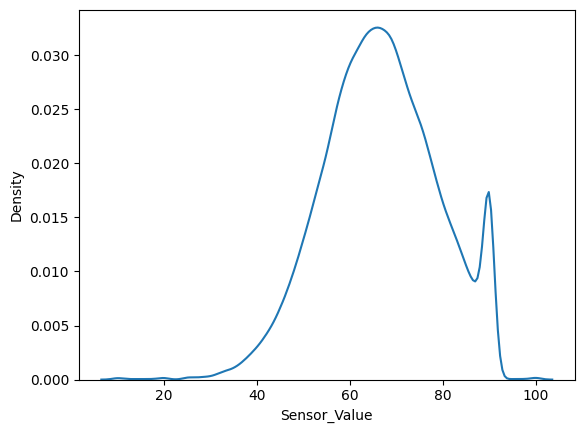

In [14]:
df_temp =  df[df['Sensor_Type'] == 'Temperature']
print(df_temp)
sns.kdeplot(data=  df_temp[df_temp['Equipment_ID']=='Mud_Pump-1'], x= 'Sensor_Value')

In [15]:
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Time_in_Minutes'] = df['Hour'] * 60 + df['Minute']
df['Decimal_Hour'] = df['Hour'] + df['Minute'] / 60

In [16]:
df['day_of_week'] = df['Timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['Timestamp'].dt.month          # Month (1–12)
df['is_weekend'] = df['day_of_week'] >= 5       # Boolean weekend
df['day'] = df['Timestamp'].dt.day
df['Time'] = df['Timestamp'].dt.time

In [17]:
print(df.shape)
# Filter data
df_filtered = df[(df['Equipment_ID'] == 'Mud_Pump-2') & (df['Sensor_Type'] == 'Temperature')]

(5829164, 14)


In [18]:
df

,Timestamp,Equipment_ID,Equipment_Type,Sensor_Type,Sensor_Value,Hour,Minute,Time_in_Minutes,Decimal_Hour,day_of_week,month,is_weekend,day,Time
0,2025-03-01 00:00:00,Mud_Pump-1,Mud_Pump,Temperature,54.040650,0,0,0,0.000000,5,3,True,1,00:00:00
1,2025-03-01 00:01:00,Mud_Pump-1,Mud_Pump,Temperature,NaN,0,1,1,0.016667,5,3,True,1,00:01:00
2,2025-03-01 00:02:00,Mud_Pump-1,Mud_Pump,Temperature,58.928634,0,2,2,0.033333,5,3,True,1,00:02:00
3,2025-03-01 00:03:00,Mud_Pump-1,Mud_Pump,Temperature,66.462983,0,3,3,0.050000,5,3,True,1,00:03:00
4,2025-03-01 00:04:00,Mud_Pump-1,Mud_Pump,Temperature,72.402513,0,4,4,0.066667,5,3,True,1,00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829159,2025-05-31 23:56:00,Mud_Pump-4,Mud_Pump,Current,50.662418,23,56,1436,23.933333,5,5,True,31,23:56:00
5829160,2025-05-31 23:57:00,Mud_Pump-4,Mud_Pump,Current,71.939440,23,57,1437,23.950000,5,5,True,31,23:57:00
5829161,2025-05-31 23:58:00,Mud_Pump-4,Mud_Pump,Current,50.000000,23,58,1438,23.966667,5,5,True,31,23:58:00
5829162,2025-05-31 23:59:00,Mud_Pump-4,Mud_Pump,Current,75.879117,23,59,1439,23.983333,5,5,True,31,23:59:00


<Axes: xlabel='Time_in_Minutes', ylabel='Sensor_Value'>

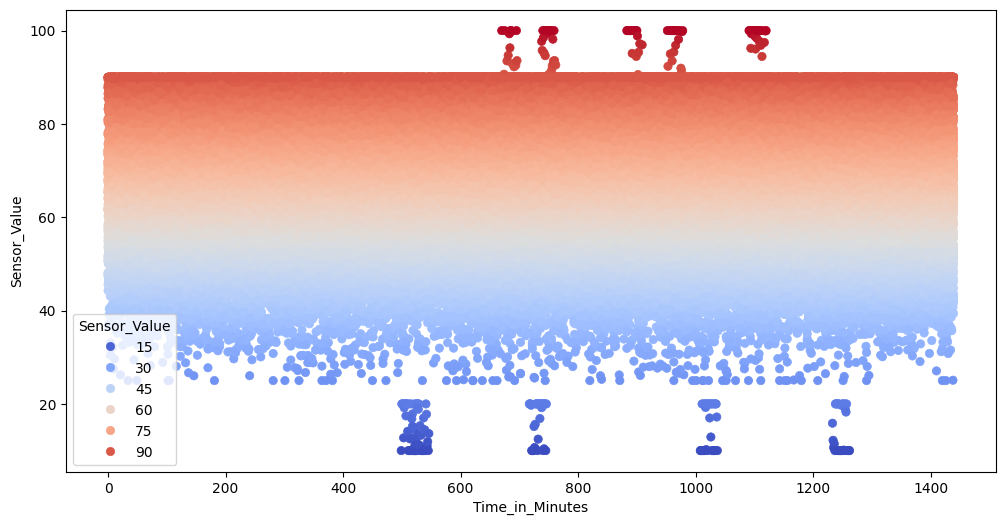

In [216]:
# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Time_in_Minutes',
    y='Sensor_Value',
    data=df_filtered,
    hue='Sensor_Value',     # Optional: color by value
    palette='coolwarm',
    edgecolor=None
)

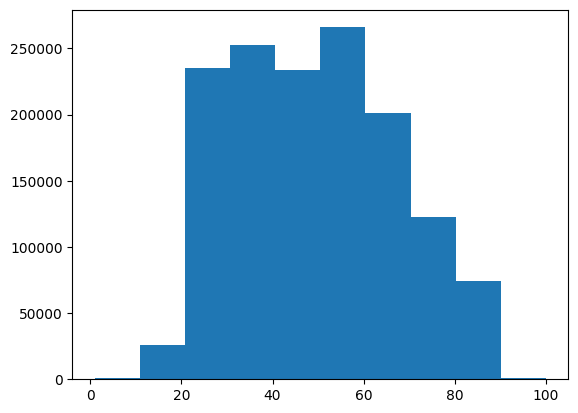

In [23]:
plt.hist(df['Sensor_Value'][df['Sensor_Type']=='Temperature'], bins=10)
plt.show()

In [24]:
print(df['Sensor_Value'][(df['Sensor_Type']=='Fluid_level') & (df['Equipment_ID'] == 'Seawater_Lift_Pump-1') ].describe())
print(df['Timestamp'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Sensor_Value, dtype: float64
count                          7816379
mean     2025-04-15 23:59:59.999996928
min                2025-03-01 00:00:00
25%                2025-03-24 00:00:00
50%                2025-04-16 00:00:00
75%                2025-05-09 00:00:00
max                2025-06-01 00:00:00
Name: Timestamp, dtype: object


In [25]:
df[df['Sensor_Value'].isna()]

,Timestamp,Equipment_ID,Equipment_Type,Sensor_Type,Sensor_Value,Time,Hour,Minute,Time_in_Minutes,Decimal_Hour,day_of_week,month,is_weekend,day
1,2025-03-01 00:01:00,Mud_Pump-1,Mud_Pump,Temperature,NaN,00:01:00,0,1,1,0.016667,5,3,True,1
31,2025-03-01 00:31:00,Mud_Pump-1,Mud_Pump,Temperature,NaN,00:31:00,0,31,31,0.516667,5,3,True,1
39,2025-03-01 00:39:00,Mud_Pump-1,Mud_Pump,Temperature,NaN,00:39:00,0,39,39,0.650000,5,3,True,1
104,2025-03-01 01:44:00,Mud_Pump-1,Mud_Pump,Temperature,NaN,01:44:00,1,44,104,1.733333,5,3,True,1
149,2025-03-01 02:29:00,Mud_Pump-1,Mud_Pump,Temperature,NaN,02:29:00,2,29,149,2.483333,5,3,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683789,2025-05-31 22:12:00,Mud_Pump-4,Mud_Pump,Current,NaN,22:12:00,22,12,1332,22.200000,5,5,True,31
7683809,2025-05-31 22:32:00,Mud_Pump-4,Mud_Pump,Current,NaN,22:32:00,22,32,1352,22.533333,5,5,True,31
7683813,2025-05-31 22:36:00,Mud_Pump-4,Mud_Pump,Current,NaN,22:36:00,22,36,1356,22.600000,5,5,True,31
7683815,2025-05-31 22:38:00,Mud_Pump-4,Mud_Pump,Current,NaN,22:38:00,22,38,1358,22.633333,5,5,True,31


In [195]:
df['Timestamp'].dt.time

0          00:00:00
1          00:01:00
2          00:02:00
3          00:03:00
4          00:04:00
             ...   
7816374    23:56:00
7816375    23:57:00
7816376    23:58:00
7816377    23:59:00
7816378    00:00:00
Name: Timestamp, Length: 7816379, dtype: object

In [223]:
df_wide = df.pivot_table(
    index=['Timestamp', 'Equipment_ID',
           'Hour', 'Minute', 'Time_in_Minutes',
           'Decimal_Hour', 'day_of_week', 'month', 
           'is_weekend', 'day', 'Equipment_Type','Time'],  # Unique row identifiers
    columns='Sensor_Type',                # Each sensor becomes a column
    values='Sensor_Value'                 # Fill values from this column
).reset_index()

In [224]:
df_wide['Timestamp'] = df_wide['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [232]:
### Pumping Equiments:
# 1. Mud Pump: Pressure, flow, current, temp, vibration
# 2. Centrifugal Pump Pressure, flow, current, temp, vibration
# 3. Seawater Lift Pump (Offshore rigs): Pressure, flow, current

df_mud_pump = df_wide[df_wide['Equipment_Type'] == 'Mud_Pump' ][[
'Timestamp', 'Equipment_ID',
           'Hour', 'Minute', 'Time_in_Minutes',
           'Decimal_Hour', 'day_of_week', 'month', 
           'is_weekend', 'day','Current', 'Flow_rate',
           'Offshore', 'Pressure', 'Temperature', 'Vibration'
]]
print(df_mud_pump.shape)
df_mud_pump= df_mud_pump.dropna()
print(df_mud_pump.shape)

(264962, 16)
(227534, 16)


In [233]:
X_Mud = df_mud_pump[[
               'Hour', 'Minute', 'Time_in_Minutes',
           'Decimal_Hour', 'day_of_week', 'month', 
           'is_weekend', 'day','Current', 'Flow_rate',
           'Offshore', 'Pressure', 'Temperature', 'Vibration'    
]]

In [237]:
print(X_Mud.isnull().sum())
print(df_mud_pump.columns)

Sensor_Type
Hour               0
Minute             0
Time_in_Minutes    0
Decimal_Hour       0
day_of_week        0
month              0
is_weekend         0
day                0
Current            0
Flow_rate          0
Offshore           0
Pressure           0
Temperature        0
Vibration          0
dtype: int64
Index(['Timestamp', 'Equipment_ID', 'Hour', 'Minute', 'Time_in_Minutes',
       'Decimal_Hour', 'day_of_week', 'month', 'is_weekend', 'day', 'Current',
       'Flow_rate', 'Offshore', 'Pressure', 'Temperature', 'Vibration',
       'ISO_anomaly'],
      dtype='object', name='Sensor_Type')


In [286]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)
model.fit(X_Mud)
df_mud_pump['ISO_anomaly'] = model.predict(X_Mud)



In [236]:
df_mud_pump[df_mud_pump['ISO_anomaly']==1].describe()

Sensor_Type,Hour,Minute,Time_in_Minutes,Decimal_Hour,day_of_week,month,day,Current,Flow_rate,Offshore,Pressure,Temperature,Vibration,ISO_anomaly
count,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.000000,225258.0
mean,11.534778,29.487290,721.573964,12.026233,3.004098,4.000417,15.830625,71.460440,2053.416165,0.295226,5087.672673,66.539602,4.286217,1.0
std,6.875758,17.281626,412.880236,6.881337,1.993534,0.820155,8.830579,11.308737,377.521242,0.456145,647.062856,12.216130,2.030778,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,25.000000,600.000000,0.000000,600.000000,10.000000,-0.500000,1.0
25%,6.000000,15.000000,365.000000,6.083333,1.000000,3.000000,8.000000,63.303391,1799.461685,0.000000,4664.904815,58.300364,2.861845,1.0
50%,12.000000,29.000000,722.000000,12.033333,3.000000,4.000000,16.000000,71.393764,2043.980127,0.000000,5071.783139,66.356097,4.112702,1.0
75%,17.000000,44.000000,1079.000000,17.983333,5.000000,5.000000,23.000000,79.913171,2299.213238,1.000000,5497.641557,74.862969,5.449186,1.0
max,23.000000,59.000000,1439.000000,23.983333,6.000000,6.000000,31.000000,105.000000,4150.000000,1.000000,9400.000000,100.000000,17.500000,1.0


<Axes: xlabel='Temperature', ylabel='Hour'>

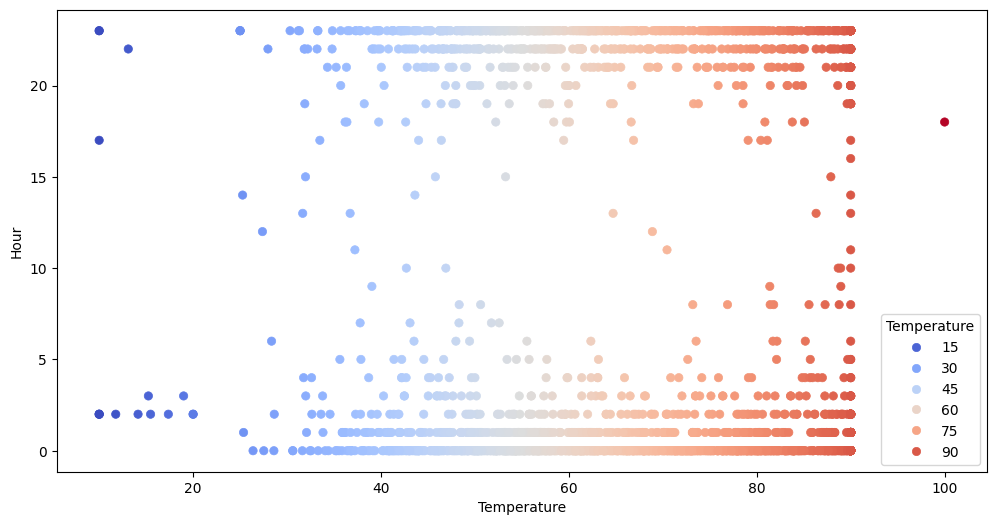

In [238]:
# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    y='Hour',
    x='Temperature',
    data=df_mud_pump[df_mud_pump['ISO_anomaly']==-1],
    hue='Temperature',     # Optional: color by value
    palette='coolwarm',
    edgecolor=None
)

<Axes: xlabel='Hour', ylabel='Temperature'>

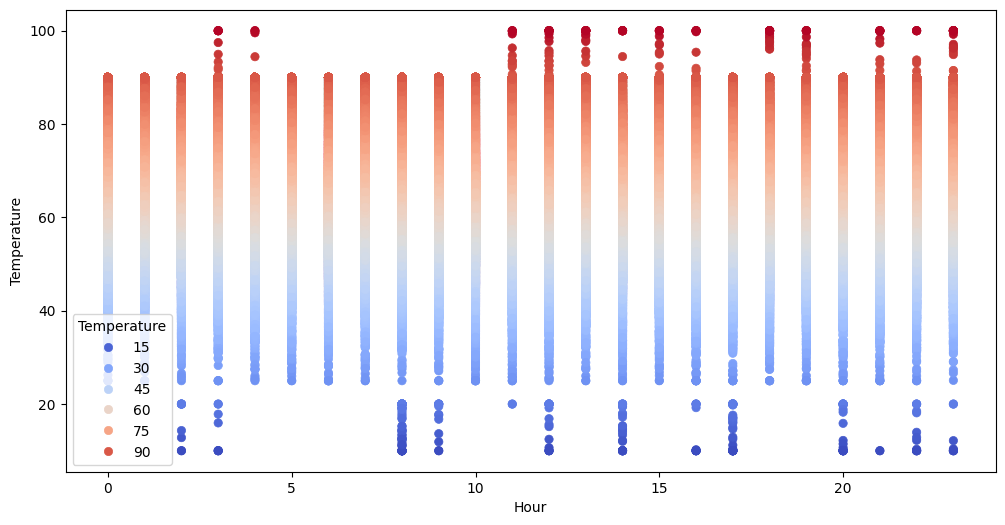

In [239]:
# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Hour',
    y='Temperature',
    data=df_mud_pump[df_mud_pump['ISO_anomaly']==1],
    hue='Temperature',     # Optional: color by value
    palette='coolwarm',
    edgecolor=None
)

<Axes: xlabel='Temperature', ylabel='Density'>

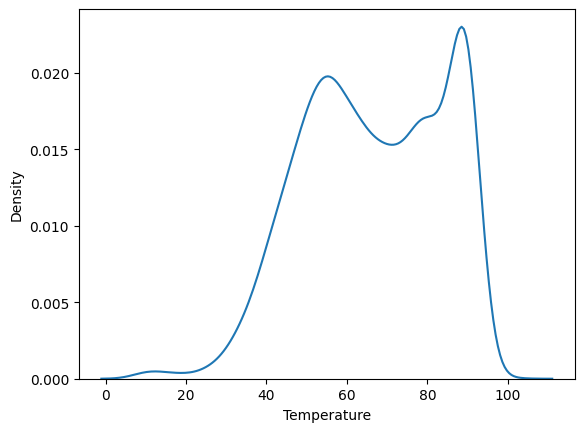

In [240]:
sns.kdeplot(data=  df_mud_pump[df_mud_pump['ISO_anomaly']==-1], x= 'Temperature')

<Axes: xlabel='Pressure', ylabel='Density'>

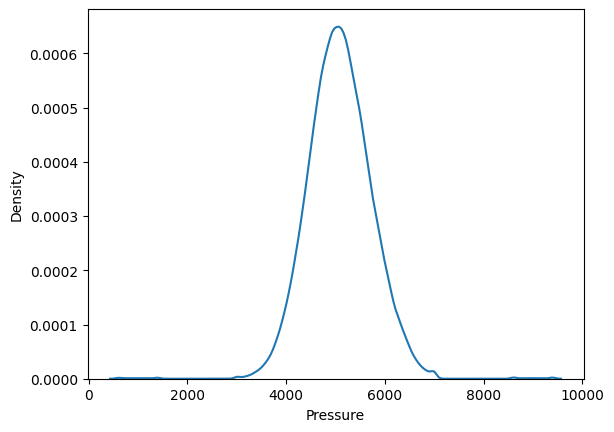

In [241]:
sns.kdeplot(data=  df_mud_pump[df_mud_pump['ISO_anomaly']==1], x= 'Pressure')

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

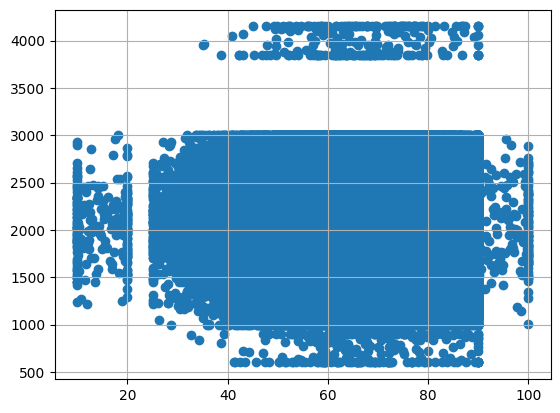

In [242]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X_Mud['Temperature'],X_Mud['Flow_rate'])
plt.show()

In [244]:
X_Mud

Sensor_Type,Hour,Minute,Time_in_Minutes,Decimal_Hour,day_of_week,month,is_weekend,day,Current,Flow_rate,Offshore,Pressure,Temperature,Vibration
2,0,0,0,0.000000,5,3,True,1,78.304724,1841.999587,0.0,5523.005660,54.040650,2.870798
3,0,0,0,0.000000,5,3,True,1,61.569429,3000.000000,0.0,5459.877490,69.250450,1.768162
16,0,2,2,0.033333,5,3,True,1,69.842729,2168.087006,0.0,4205.907749,58.928634,2.198852
17,0,2,2,0.033333,5,3,True,1,71.500295,1974.249582,0.0,4731.230543,70.412269,5.625817
23,0,3,3,0.050000,5,3,True,1,71.757310,1874.707989,1.0,5297.873695,66.462983,2.171929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927349,23,58,1438,23.966667,5,5,True,31,61.421297,2096.663819,0.0,5862.562251,41.270010,9.059100
927355,23,59,1439,23.983333,5,5,True,31,90.000000,1801.575897,0.0,4895.709982,67.747517,5.027685
927356,23,59,1439,23.983333,5,5,True,31,62.182828,1808.402608,1.0,4809.454787,74.325650,4.725444
927362,0,0,0,0.000000,6,6,True,1,54.986505,2086.044924,0.0,4722.109774,78.201090,5.832813


Optimal number of clusters: 4


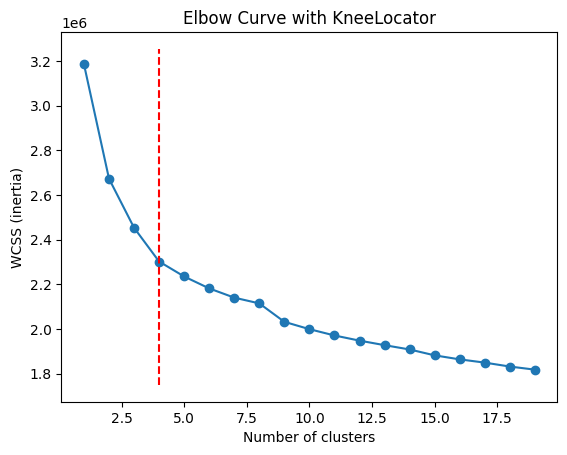

In [245]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Prepare data

X_Mud_scaled = StandardScaler().fit_transform(X_Mud)

# Elbow method - calculate WCSS
wcss = []
K_range = range(1, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_Mud_scaled)
    wcss.append(kmeans.inertia_)

# Automatically find elbow
knee = KneeLocator(K_range, wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f"Optimal number of clusters: {optimal_k}")

# Optional: Plot
plt.plot(K_range, wcss, marker='o')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.title("Elbow Curve with KneeLocator")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (inertia)")
plt.show()


In [246]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_mud_pump['cluster'] = kmeans.fit_predict(X_Mud_scaled)

In [247]:
# Get distance of each point to its cluster center
centroids = kmeans.cluster_centers_
df_mud_pump['distance_to_center'] = [
    np.linalg.norm(x - centroids[int(label)])
    for x, label in zip(X_Mud_scaled, df_mud_pump['cluster'])
]

# Set threshold — flag as anomaly if distance too high
threshold = df_mud_pump['distance_to_center'].quantile(0.95)  # top 5% are anomalies
df_mud_pump['is_anomaly'] = df_mud_pump['distance_to_center'] > threshold

In [248]:
print(df_mud_pump['is_anomaly'].value_counts())

is_anomaly
False    216157
True      11377
Name: count, dtype: int64


In [249]:
df_mud_pump['cluster'].value_counts()

cluster
2    80382
3    80269
1    33541
0    33342
Name: count, dtype: int64

<Axes: xlabel='Temperature', ylabel='Density'>

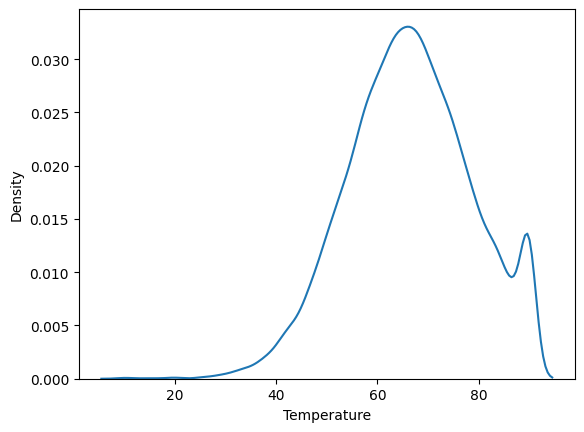

In [250]:
sns.kdeplot(data=  df_mud_pump[df_mud_pump['cluster']==0], x= 'Temperature')

<Axes: xlabel='Temperature', ylabel='Density'>

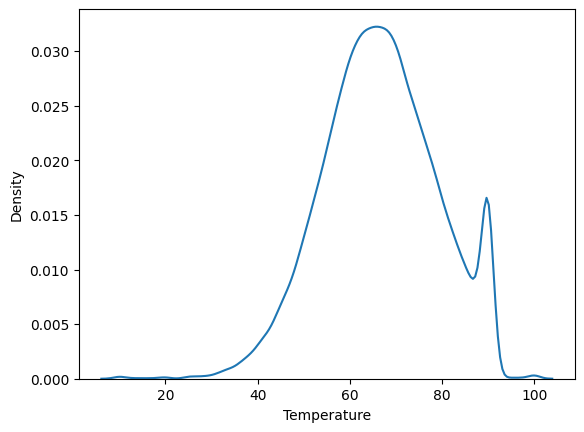

In [251]:
sns.kdeplot(data=  df_mud_pump[df_mud_pump['cluster']==2], x= 'Temperature')

<Axes: xlabel='Flow_rate', ylabel='Density'>

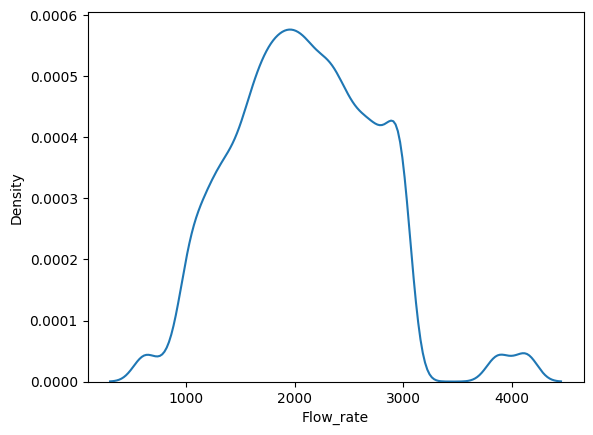

In [254]:
sns.kdeplot(data=  df_mud_pump[df_mud_pump['is_anomaly']==True], x= 'Flow_rate')

<Axes: xlabel='Flow_rate', ylabel='Density'>

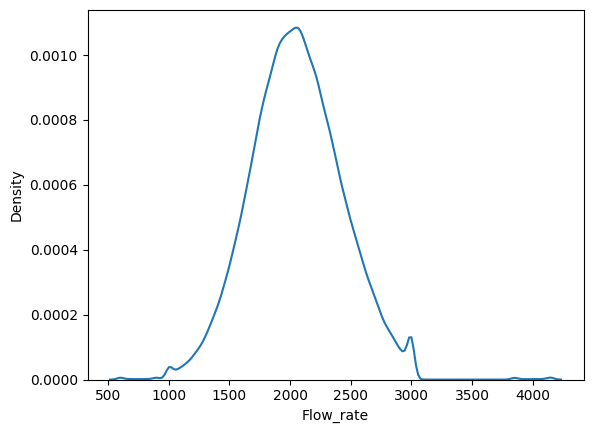

In [102]:
sns.kdeplot(data=  df_mud_pump, x= 'Flow_rate')

<Axes: xlabel='Flow_rate', ylabel='Density'>

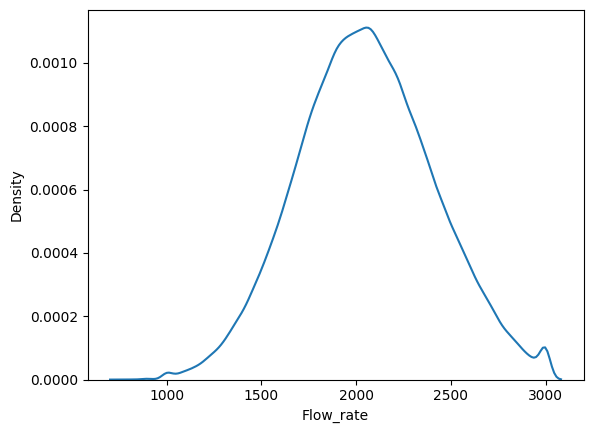

In [101]:
sns.kdeplot(data=  df_mud_pump[df_mud_pump['is_anomaly']==False], x= 'Flow_rate')

In [99]:
print(df_mud_pump[(df_mud_pump['AE_anomaly']== True) & (df_mud_pump['is_anomaly'] == True)].shape)
df_mud_pump[(df_mud_pump['AE_anomaly']== True) & (df_mud_pump['ISO_anomaly'] == -1)].shape

(7858, 23)


(1081, 23)

<Axes: xlabel='Flow_rate', ylabel='Density'>

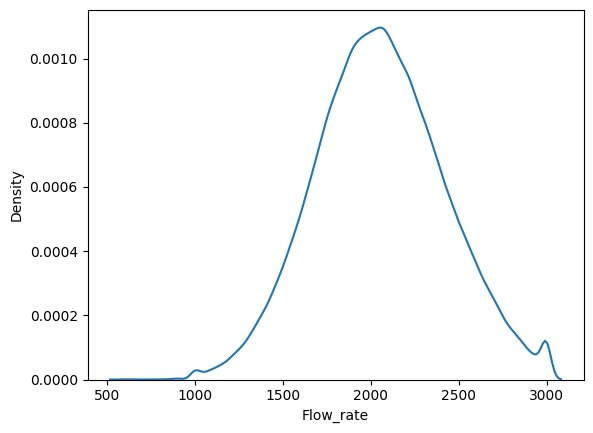

In [100]:
sns.kdeplot(data=  df_mud_pump[df_mud_pump['AE_anomaly']==False], x= 'Flow_rate')

<Axes: xlabel='Time_in_Minutes', ylabel='Temperature'>

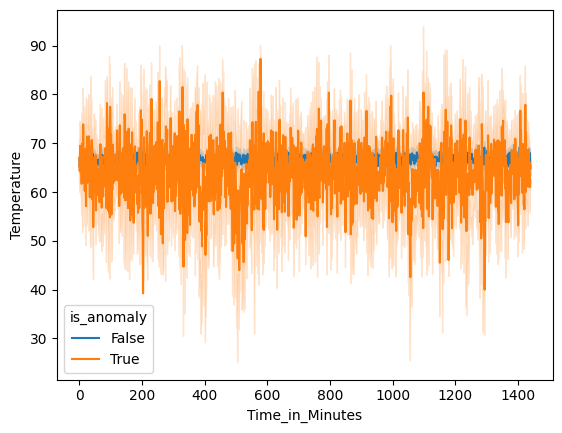

In [74]:
import seaborn as sns
sns.lineplot(data=df_mud_pump, x='Time_in_Minutes', y='Temperature', hue='is_anomaly')

<Axes: xlabel='Time_in_Minutes', ylabel='Temperature'>

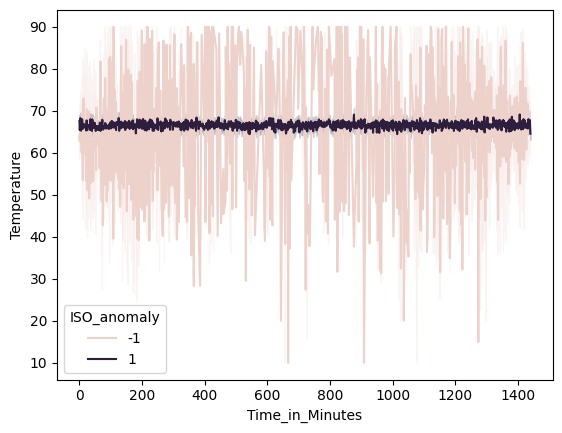

In [ ]:
import seaborn as sns
sns.lineplot(data=df_mud_pump, x='Time_in_Minutes', y='Temperature', hue='ISO_anomaly')

7111/7111 ━━━━━━━━━━━━━━━━━━━━ 1s 192us/step


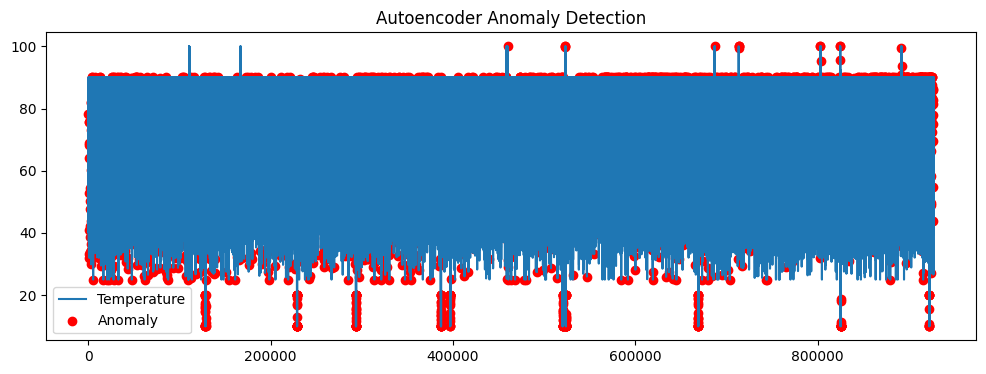

In [316]:
# Define autoencoder

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


input_dim = X_Mud_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile and train
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_Mud_scaled, X_Mud_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Predict reconstruction
reconstructions = autoencoder.predict(X_Mud_scaled)
mse = np.mean(np.square(X_Mud_scaled - reconstructions), axis=1)

# Set threshold for anomaly
threshold = np.percentile(mse, 98)
df_mud_pump['reconstruction_error'] = mse
df_mud_pump['AE_anomaly'] = mse > threshold

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df_mud_pump['Temperature'], label='Temperature')
plt.scatter(df_mud_pump[df_mud_pump['AE_anomaly']].index, df_mud_pump[df_mud_pump['AE_anomaly']]['Temperature'], color='red', label='Anomaly')
plt.legend()
plt.title("Autoencoder Anomaly Detection")
plt.show()

Sensor_Type         Hour       Minute  Time_in_Minutes  Decimal_Hour  \
count        9102.000000  9102.000000      9102.000000   9102.000000   
mean           11.413096    30.321248       715.107009     11.918450   
std             6.792583    20.016652       407.514339      6.791906   
min             0.000000     0.000000         0.000000      0.000000   
25%             6.000000    11.000000       361.000000      6.016667   
50%            11.000000    31.000000       711.000000     11.850000   
75%            17.000000    50.000000      1053.000000     17.550000   
max            23.000000    59.000000      1439.000000     23.983333   

Sensor_Type  day_of_week        month          day      Current    Flow_rate  \
count        9102.000000  9102.000000  9102.000000  9102.000000  9102.000000   
mean            3.014392     4.072731    16.229510    71.973688  2112.637575   
std             2.009130     0.877376    10.164678    14.579156   776.663840   
min             0.000000     3.

<Axes: xlabel='Pressure', ylabel='Density'>

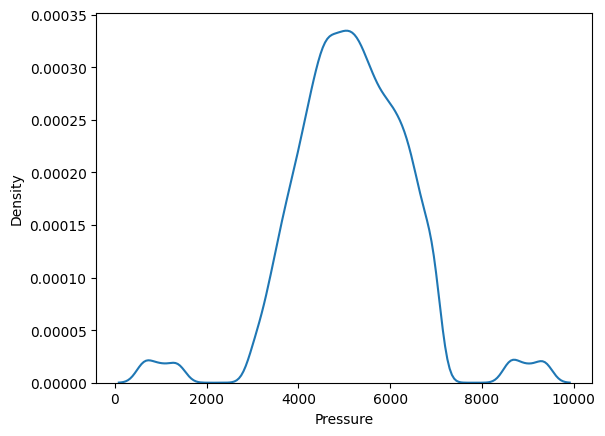

In [196]:
print(df_mud_pump[df_mud_pump['AE_anomaly']==True].describe())
sns.kdeplot(data=  df_mud_pump[df_mud_pump['is_anomaly']==True], x= 'Pressure')

<Axes: xlabel='Pressure', ylabel='Density'>

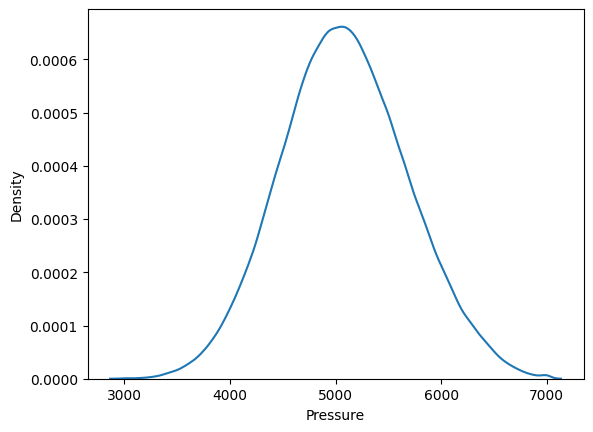

In [197]:
sns.kdeplot(data=  df_mud_pump[df_mud_pump['is_anomaly']==False], x= 'Pressure')

In [108]:
df_mud_pump[(df_mud_pump['is_anomaly'] == True) & (df_mud_pump['Equipment_ID'] == 'Mud_Pump-1') & (df_mud_pump['day']==10) & (df_mud_pump['month']==5)].sort_values(by='Time')

Sensor_Type,Time,Equipment_ID,Hour,Minute,Time_in_Minutes,Decimal_Hour,day_of_week,month,is_weekend,day,...,Pressure,Temperature,Vibration,cluster,distance_to_center,is_anomaly,anomaly,ISO_anomaly,reconstruction_error,AE_anomaly
1374,00:01:00,Mud_Pump-1,0,1,1,0.016667,5,5,True,10,...,4607.205025,88.967923,1.000000,0,4.246784,True,-1,-1,0.716844,False
6434,00:06:00,Mud_Pump-1,0,6,6,0.100000,5,5,True,10,...,3562.393121,55.383172,2.994462,0,4.032895,True,-1,1,0.711623,False
12506,00:12:00,Mud_Pump-1,0,12,12,0.200000,5,5,True,10,...,4441.652072,90.000000,5.266455,0,4.086811,True,-1,-1,0.814964,False
14530,00:14:00,Mud_Pump-1,0,14,14,0.233333,5,5,True,10,...,5875.446316,54.457430,8.427689,0,4.306692,True,-1,-1,0.987183,True
28698,00:28:00,Mud_Pump-1,0,28,28,0.466667,5,5,True,10,...,4157.452114,61.219227,5.668929,0,4.053857,True,-1,-1,0.762596,False
43878,00:43:00,Mud_Pump-1,0,43,43,0.716667,5,5,True,10,...,3000.000000,73.905289,2.251038,0,4.554817,True,-1,1,1.134381,True
71202,01:10:00,Mud_Pump-1,1,10,70,1.166667,5,5,True,10,...,4482.809371,41.998260,10.000000,0,4.642144,True,1,-1,0.618009,False
118766,01:57:00,Mud_Pump-1,1,57,117,1.950000,5,5,True,10,...,5500.311371,41.899698,3.356106,0,3.969587,True,1,1,0.681986,False
122814,02:01:00,Mud_Pump-1,2,1,121,2.016667,5,5,True,10,...,4550.213869,60.293164,6.581297,0,4.283449,True,1,-1,1.004908,True
190618,03:08:00,Mud_Pump-1,3,8,188,3.133333,5,5,True,10,...,3971.979283,49.865586,3.210330,0,4.043482,True,1,1,0.869760,False


<Axes: xlabel='Temperature', ylabel='Density'>

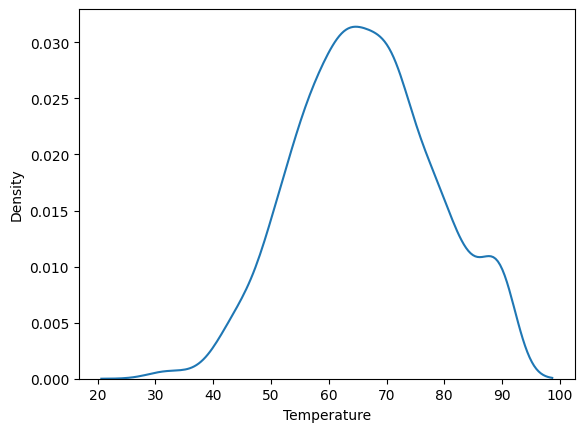

In [112]:
sns.kdeplot(data=  df_mud_pump[(df_mud_pump['Equipment_ID'] == 'Mud_Pump-1') & (df_mud_pump['day']==10) & (df_mud_pump['month']==5)],x='Temperature')

<Axes: xlabel='Time_in_Minutes', ylabel='Temperature'>

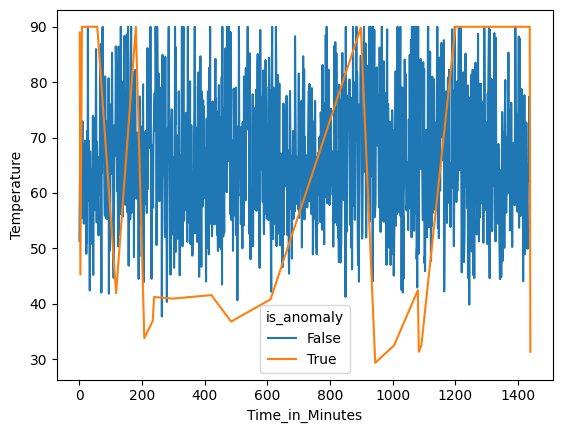

In [133]:
sns.lineplot(data=df_mud_pump[(df_mud_pump['Equipment_ID'] == 'Mud_Pump-1') & (df_mud_pump['day']==10) & (df_mud_pump['month']==5)],x='Time_in_Minutes',y='Temperature',hue='is_anomaly')

<Axes: xlabel='Pressure', ylabel='Flow_rate'>

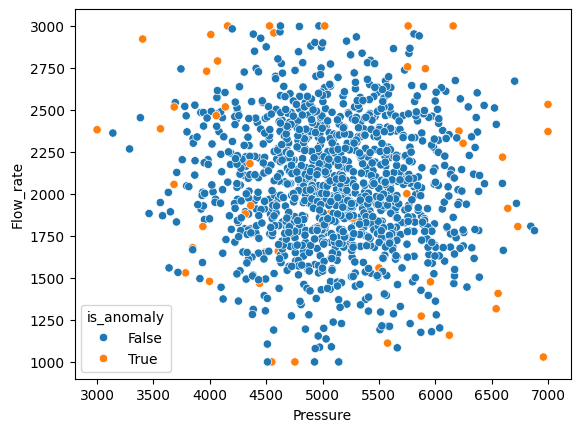

In [187]:
sns.scatterplot(data=df_mud_pump[(df_mud_pump['Equipment_ID'] == 'Mud_Pump-1') & (df_mud_pump['day']==10) & (df_mud_pump['month']==5)],x='Pressure',y='Flow_rate',hue='is_anomaly')

In [ ]:
X_Mud = df_mud_pump[[
               'Hour', 'Minute', 'Time_in_Minutes',
           'Decimal_Hour', 'day_of_week', 'month', 
           'is_weekend', 'day','Current', 'Flow_rate',
           'Offshore', 'Pressure', 'Temperature', 'Vibration'    
]]

In [331]:
from statsmodels.tsa.api import VAR

# Filter for one sensor
df_sensor = df_mud_pump.set_index('Timestamp').sort_index()


df_multivariate = df_sensor[['Temperature', 'Pressure', 'Flow_rate']].dropna()
model = VAR(df_multivariate)
model_fitted = model.fit()
forecast = model_fitted.forecast(df_multivariate.values[-model_fitted.k_ar:], steps=10)


/Users/rahulgupta/Downloads/Planogram_Compliance/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [332]:
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Jun, 2025
Time:                     21:22:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    29.8496
Nobs:                     227533.    HQIC:                   29.8492
Log likelihood:      -4.36438e+06    FPE:                9.18930e+12
AIC:                      29.8491    Det(Omega_mle):     9.18881e+12
--------------------------------------------------------------------
Results for equation Temperature
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 66.427471         0.283109          234.635           0.000
L1.Temperature         0.002289         0.002096            1.092           0.275
L1.Pressure            0.000024         0.000040  

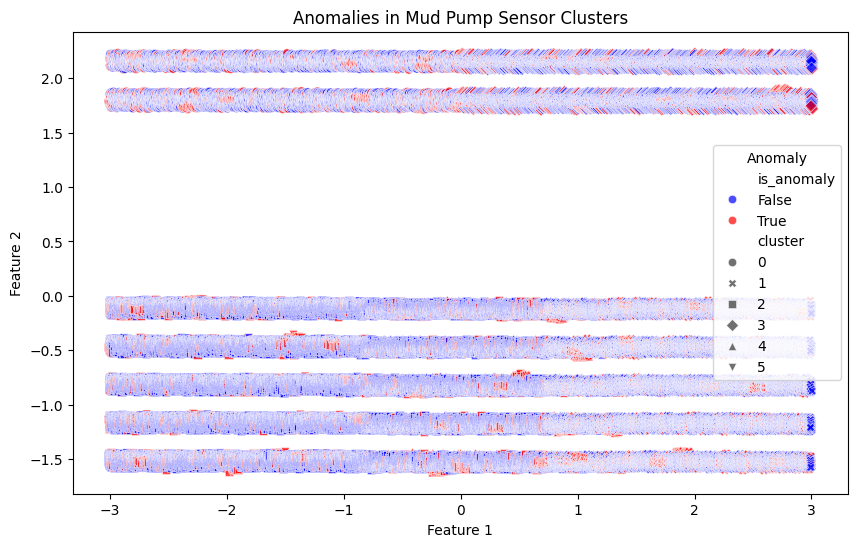

In [184]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Mud_scaled)

df_mud_pump['PCA1'] = X_pca[:, 0]
df_mud_pump['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_mud_pump,
    x='PCA1',  # or the original feature names
    y='PCA2',
    hue='is_anomaly',
    style='cluster',
    palette={False: 'blue', True: 'red'},
    markers={0: 'o', 1: 'X', 2: 's',3:'D',4:'^',5:'v'},  # for 3 clusters
    alpha=0.7
)
plt.title("Anomalies in Mud Pump Sensor Clusters")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Anomaly')
plt.show()

<Axes: >

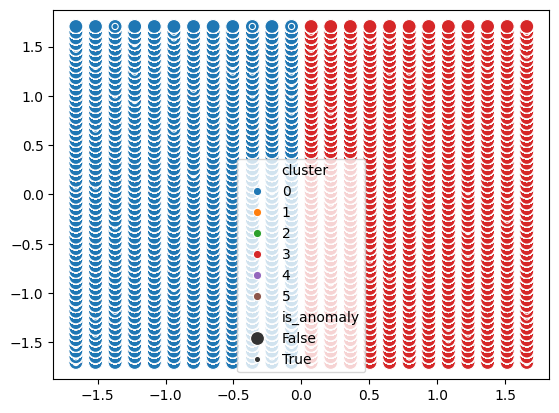

In [176]:
sns.scatterplot(
    x=X_Mud_scaled[:,0], y=X_Mud_scaled[:,1],
    hue=df_mud_pump['cluster'],  # color by cluster
    size=df_mud_pump['is_anomaly'],  # size anomaly vs normal
    palette="tab10",
    sizes=(20, 100)
)


In [152]:
import pandas as pd
import numpy as np
import random
from datetime import timedelta

# Sample configuration
equipment_units = ['Mud_Pump-1','Mud_Pump-2','Centrifugal_Pump-1',
                   'Seawater_Lift_Pump-2','Seawater_Lift_Pump-3',
                   'Centrifugal_Pump-2','Seawater_Lift_Pump-4']

operator_phrases = {
    "maintenance": [
        "Performed routine maintenance on {equip}.",
        "Scheduled lubrication task completed for {equip}.",
        "Checked and tightened bolts on {equip}.",
        "Preventive maintenance done on {equip} at {time}."
    ],
    "observation": [
        "Noticed spike in pressure on {equip}.",
        "Unusual vibration detected on {equip}.",
        "Minor temperature fluctuations observed on {equip}.",
        "{equip} behaving abnormally around {time}.",
        "Possible sensor error in {equip}."
    ],
    "repair": [
        "Replaced valve in {equip}.",
        "Fixed leak detected in {equip}.",
        "Pump alignment corrected for {equip}.",
        "Electrical inspection completed for {equip}."
    ],
    "misc": [
        "All systems operating normally.",
        "No abnormal readings reported today.",
        "Weather rough, expect sensor drift.",
        "Site operating in reduced mode."
    ]
}

# Generate timestamps: 1–3 logs per day
log_dates = pd.date_range(start="2024-10-01", end="2025-06-01", freq='D')
logs = []

for date in log_dates:
    num_logs_today = np.random.choice([1, 2, 3])
    for _ in range(num_logs_today):
        equip = random.choice(equipment_units)
        category = random.choice(list(operator_phrases.keys()))
        phrase = random.choice(operator_phrases[category])
        
        log_time = date + timedelta(minutes=random.randint(0, 1439))  # Random time in the day
        entry = phrase.format(equip=equip, time=log_time.strftime('%H:%M'))

        logs.append({
            "Timestamp": log_time,
            "Equipment_ID": equip,
            "Log_Type": category,
            "Operator_Log": entry
        })

# Create DataFrame
df_logs = pd.DataFrame(logs)
df_logs.sort_values(by='Timestamp', inplace=True)
print(df_logs.head())

# Export (optional)
# df_logs.to_csv("synthetic_operator_logs.csv", index=False)


            Timestamp          Equipment_ID     Log_Type  \
1 2024-10-01 01:28:00  Seawater_Lift_Pump-2  maintenance   
0 2024-10-01 19:32:00    Centrifugal_Pump-2  maintenance   
2 2024-10-02 20:45:00  Seawater_Lift_Pump-2  maintenance   
4 2024-10-03 02:26:00            Mud_Pump-2       repair   
3 2024-10-03 09:13:00  Seawater_Lift_Pump-4  observation   

                                        Operator_Log  
1  Performed routine maintenance on Seawater_Lift...  
0  Checked and tightened bolts on Centrifugal_Pum...  
2  Checked and tightened bolts on Seawater_Lift_P...  
4                      Replaced valve in Mud_Pump-2.  
3  Unusual vibration detected on Seawater_Lift_Pu...  


In [153]:
df_logs['Hour'] = df_logs['Timestamp'].dt.hour
df_logs['Minute'] = df_logs['Timestamp'].dt.minute
df_logs['Time_in_Minutes'] = df_logs['Hour'] * 60 + df_logs['Minute']
df_logs['Decimal_Hour'] = df_logs['Hour'] + df_logs['Minute'] / 60

In [154]:
df_logs['day_of_week'] = df_logs['Timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
df_logs['month'] = df_logs['Timestamp'].dt.month          # Month (1–12)
df_logs['is_weekend'] = df_logs['day_of_week'] >= 5       # Boolean weekend
df_logs['day'] = df_logs['Timestamp'].dt.day
df_logs['Time'] = df_logs['Timestamp'].dt.time

In [267]:
df_operator_logs.dtypes
df_mud_pump['Timestamp'] = pd.to_datetime(df_mud_pump['Timestamp'])

In [344]:
df_anomalies = df_mud_pump[df_mud_pump['is_anomaly'] == True]

In [345]:
df_anomalies

Sensor_Type,Timestamp,Equipment_ID,Hour,Minute,Time_in_Minutes,Decimal_Hour,day_of_week,month,is_weekend,day,...,Offshore,Pressure,Temperature,Vibration,ISO_anomaly,cluster,distance_to_center,is_anomaly,reconstruction_error,AE_anomaly
3,2025-03-01 00:00:00,Mud_Pump-2,0,0,0,0.000000,5,3,True,1,...,0.0,5459.877490,69.250450,1.768162,-1,0,4.295275,True,1.084016,False
24,2025-03-01 00:03:00,Mud_Pump-2,0,3,3,0.050000,5,3,True,1,...,1.0,4684.508221,78.290508,9.320398,-1,0,4.681682,True,1.132464,True
37,2025-03-01 00:05:00,Mud_Pump-1,0,5,5,0.083333,5,3,True,1,...,0.0,5586.016712,55.213607,1.526520,1,0,4.200581,True,1.020775,False
94,2025-03-01 00:13:00,Mud_Pump-2,0,13,13,0.216667,5,3,True,1,...,0.0,3675.759824,68.378765,8.245597,-1,0,4.121295,True,0.771659,False
101,2025-03-01 00:14:00,Mud_Pump-2,0,14,14,0.233333,5,3,True,1,...,1.0,5383.655884,82.293964,8.880144,-1,0,4.259962,True,0.628396,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927327,2025-05-31 23:55:00,Mud_Pump-1,23,55,1435,23.916667,5,5,True,31,...,0.0,5539.324987,39.313575,3.458429,-1,1,4.180467,True,0.637415,False
927334,2025-05-31 23:56:00,Mud_Pump-1,23,56,1436,23.933333,5,5,True,31,...,0.0,4548.166638,52.589471,1.665655,-1,1,4.368059,True,0.500012,False
927349,2025-05-31 23:58:00,Mud_Pump-2,23,58,1438,23.966667,5,5,True,31,...,0.0,5862.562251,41.270010,9.059100,-1,1,4.664630,True,0.815186,False
927362,2025-06-01 00:00:00,Mud_Pump-1,0,0,0,0.000000,6,6,True,1,...,0.0,4722.109774,78.201090,5.832813,-1,0,4.288009,True,0.505565,False


In [19]:
# pd.to_pickle(df_mud_pump,'Final_Anomaly_Data.pkl')
pd.to_pickle(df_operator_logs, 'Final_Operator_Log.pkl')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
log_vectors = vectorizer.fit_transform(df_operator_logs['Operator_Log'])

In [362]:
df_anomalies

Sensor_Type,Timestamp,Equipment_ID,Hour,Minute,Time_in_Minutes,Decimal_Hour,day_of_week,month,is_weekend,day,...,Offshore,Pressure,Temperature,Vibration,ISO_anomaly,cluster,distance_to_center,is_anomaly,reconstruction_error,AE_anomaly
3,2025-03-01 00:00:00,Mud_Pump-2,0,0,0,0.000000,5,3,True,1,...,0.0,5459.877490,69.250450,1.768162,-1,0,4.295275,True,1.084016,False
24,2025-03-01 00:03:00,Mud_Pump-2,0,3,3,0.050000,5,3,True,1,...,1.0,4684.508221,78.290508,9.320398,-1,0,4.681682,True,1.132464,True
37,2025-03-01 00:05:00,Mud_Pump-1,0,5,5,0.083333,5,3,True,1,...,0.0,5586.016712,55.213607,1.526520,1,0,4.200581,True,1.020775,False
94,2025-03-01 00:13:00,Mud_Pump-2,0,13,13,0.216667,5,3,True,1,...,0.0,3675.759824,68.378765,8.245597,-1,0,4.121295,True,0.771659,False
101,2025-03-01 00:14:00,Mud_Pump-2,0,14,14,0.233333,5,3,True,1,...,1.0,5383.655884,82.293964,8.880144,-1,0,4.259962,True,0.628396,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927327,2025-05-31 23:55:00,Mud_Pump-1,23,55,1435,23.916667,5,5,True,31,...,0.0,5539.324987,39.313575,3.458429,-1,1,4.180467,True,0.637415,False
927334,2025-05-31 23:56:00,Mud_Pump-1,23,56,1436,23.933333,5,5,True,31,...,0.0,4548.166638,52.589471,1.665655,-1,1,4.368059,True,0.500012,False
927349,2025-05-31 23:58:00,Mud_Pump-2,23,58,1438,23.966667,5,5,True,31,...,0.0,5862.562251,41.270010,9.059100,-1,1,4.664630,True,0.815186,False
927362,2025-06-01 00:00:00,Mud_Pump-1,0,0,0,0.000000,6,6,True,1,...,0.0,4722.109774,78.201090,5.832813,-1,0,4.288009,True,0.505565,False


In [396]:
import pandas as pd
from datetime import timedelta

# Ensure timestamp columns are datetime
df_anomalies['Timestamp'] = pd.to_datetime(df_anomalies['Timestamp'])
df_operator_logs['Timestamp'] = pd.to_datetime(df_operator_logs['Timestamp'])

# Define time window (±30 minutes)
time_window = timedelta(minutes=30)

# Match logs to anomalies based on timestamp window and Equipment_ID
def match_logs_with_equipment(anomaly_df, logs_df, window):
    matched_logs = []

    for _, anomaly in anomaly_df.iterrows():
        anomaly_time = anomaly['Timestamp']
        equipment_id = anomaly['Equipment_ID']

        # Filter logs within time window and same equipment
        nearby_logs = logs_df[
            (logs_df['Equipment_ID'] == equipment_id) &
            (logs_df['Timestamp'] >= anomaly_time - window) &
            (logs_df['Timestamp'] <= anomaly_time + window)
        ]

        if not nearby_logs.empty:
            combined_log = ' | '.join(nearby_logs['Operator_Log'].tolist())
        else:
            combined_log = None

        matched_logs.append(combined_log)

    anomaly_df = anomaly_df.copy()
    anomaly_df['Matched_Log'] = matched_logs
    return anomaly_df

# Apply matching
df_anomaly_with_logs = match_logs_with_equipment(df_anomalies, df_operator_logs, time_window)

# # Preview result
# print(df_anomaly_with_logs[['Timestamp', 'Equipment_ID', 'Sensor_Type', 'Matched_Log']].head())


/var/folders/58/lclwr9qs1b7bxnvdvbjqb7280000gn/T/ipykernel_63314/1951656354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anomalies['Timestamp'] = pd.to_datetime(df_anomalies['Timestamp'])


In [395]:
from rapidfuzz import fuzz
import pandas as pd
from datetime import timedelta

# Ensure datetime format
df_anomalies['Timestamp'] = pd.to_datetime(df_anomalies['Timestamp'])
df_operator_logs['Timestamp'] = pd.to_datetime(df_operator_logs['Timestamp'])

# Matching function
def fuzzy_match_logs(anomaly_df, log_df, time_window=30, score_threshold=80):
    matched_logs = []

    for _, anomaly_row in anomaly_df.iterrows():
        a_time = anomaly_row['Timestamp']
        a_equip = anomaly_row['Equipment_ID']

        # Filter logs within time window
        nearby_logs = log_df[
            (log_df['Timestamp'] >= a_time - timedelta(minutes=time_window)) &
            (log_df['Timestamp'] <= a_time + timedelta(minutes=time_window))
        ]

        # Fuzzy match equipment ID to log text
        best_score = 0
        best_log = None
        for _, log_row in nearby_logs.iterrows():
            score = fuzz.partial_ratio(a_equip.lower(), log_row['Operator_Log'].lower())
            if score > best_score and score >= score_threshold:
                best_score = score
                best_log = log_row['Operator_Log']

        matched_logs.append(best_log)

    anomaly_df = anomaly_df.copy()
    anomaly_df['Matched_Log'] = matched_logs
    return anomaly_df

# Apply matching
df_anomaly_with_fuzzy_logs = fuzzy_match_logs(df_anomalies, df_operator_logs)

# Preview
print(df_anomaly_with_fuzzy_logs[['Timestamp', 'Equipment_ID', 'Matched_Log']].head())


/var/folders/58/lclwr9qs1b7bxnvdvbjqb7280000gn/T/ipykernel_63314/937317789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anomalies['Timestamp'] = pd.to_datetime(df_anomalies['Timestamp'])


Sensor_Type           Timestamp Equipment_ID  \
3           2025-03-01 00:00:00   Mud_Pump-2   
24          2025-03-01 00:03:00   Mud_Pump-2   
37          2025-03-01 00:05:00   Mud_Pump-1   
94          2025-03-01 00:13:00   Mud_Pump-2   
101         2025-03-01 00:14:00   Mud_Pump-2   

Sensor_Type                                        Matched_Log  
3            Offshore on Mud_Pump-1 looks off. [2025-03-01 ...  
24           Offshore on Mud_Pump-1 looks off. [2025-03-01 ...  
37           Offshore on Mud_Pump-1 looks off. [2025-03-01 ...  
94           Offshore on Mud_Pump-1 looks off. [2025-03-01 ...  
101          Offshore on Mud_Pump-1 looks off. [2025-03-01 ...  


In [398]:
df_anomaly_with_fuzzy_logs[df_anomaly_with_fuzzy_logs['Matched_Log'].isnull() == False]

Sensor_Type,Timestamp,Equipment_ID,Hour,Minute,Time_in_Minutes,Decimal_Hour,day_of_week,month,is_weekend,day,...,Pressure,Temperature,Vibration,ISO_anomaly,cluster,distance_to_center,is_anomaly,reconstruction_error,AE_anomaly,Matched_Log
3,2025-03-01 00:00:00,Mud_Pump-2,0,0,0,0.000000,5,3,True,1,...,5459.877490,69.250450,1.768162,-1,0,4.295275,True,1.084016,False,Offshore on Mud_Pump-1 looks off. [2025-03-01 ...
24,2025-03-01 00:03:00,Mud_Pump-2,0,3,3,0.050000,5,3,True,1,...,4684.508221,78.290508,9.320398,-1,0,4.681682,True,1.132464,True,Offshore on Mud_Pump-1 looks off. [2025-03-01 ...
37,2025-03-01 00:05:00,Mud_Pump-1,0,5,5,0.083333,5,3,True,1,...,5586.016712,55.213607,1.526520,1,0,4.200581,True,1.020775,False,Offshore on Mud_Pump-1 looks off. [2025-03-01 ...
94,2025-03-01 00:13:00,Mud_Pump-2,0,13,13,0.216667,5,3,True,1,...,3675.759824,68.378765,8.245597,-1,0,4.121295,True,0.771659,False,Offshore on Mud_Pump-1 looks off. [2025-03-01 ...
101,2025-03-01 00:14:00,Mud_Pump-2,0,14,14,0.233333,5,3,True,1,...,5383.655884,82.293964,8.880144,-1,0,4.259962,True,0.628396,False,Offshore on Mud_Pump-1 looks off. [2025-03-01 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926907,2025-05-31 22:55:00,Mud_Pump-1,22,55,1375,22.916667,5,5,True,31,...,4052.730043,39.019752,2.709618,-1,1,4.466831,True,0.585824,False,Had a spike in Offshore for Mud_Pump-2 — might...
926928,2025-05-31 22:58:00,Mud_Pump-1,22,58,1378,22.966667,5,5,True,31,...,4456.407978,74.907673,9.009224,-1,1,4.551408,True,1.111264,True,Had a spike in Offshore for Mud_Pump-2 — might...
926929,2025-05-31 22:58:00,Mud_Pump-2,22,58,1378,22.966667,5,5,True,31,...,3823.621804,54.907072,2.664822,-1,1,4.131343,True,0.854232,False,Had a spike in Offshore for Mud_Pump-2 — might...
926935,2025-05-31 22:59:00,Mud_Pump-1,22,59,1379,22.983333,5,5,True,31,...,4279.492327,60.857751,3.053752,1,1,4.098652,True,0.921752,False,Had a spike in Offshore for Mud_Pump-2 — might...


In [378]:
pd.to_pickle(df_anomaly_with_fuzzy_logs, 'anomaly_operator_logs.pkl')

In [306]:
df_operator_logs[['Equipment_Type','id']]=df_operator_logs.Equipment_ID.str.split('-',expand= True)

In [315]:
df_operator_logs[df_operator_logs['Equipment_Type']=='Mud_Pump'].sort_values(by='Timestamp',ascending= False)

,Timestamp,Equipment_ID,Operator_Log,"(Equipment_Type, id)",Equipment_Type,id
3504,2025-05-24 11:42:00,Mud_Pump-2,Offshore on Mud_Pump-2 looks off. [2025-05-24 ...,"[Mud_Pump, 2]",Mud_Pump,2
288,2025-05-24 11:42:00,Mud_Pump-1,Temperature on Mud_Pump-1 looks off. [2025-05-...,"[Mud_Pump, 1]",Mud_Pump,1
1456,2025-05-24 11:42:00,Mud_Pump-1,Unusual Current metrics observed in Mud_Pump-1...,"[Mud_Pump, 1]",Mud_Pump,1
1756,2025-05-24 11:42:00,Mud_Pump-1,Looks like something's off with Offshore on Mu...,"[Mud_Pump, 1]",Mud_Pump,1
877,2025-05-24 11:42:00,Mud_Pump-1,Looks like something's off with Vibration on M...,"[Mud_Pump, 1]",Mud_Pump,1
...,...,...,...,...,...,...
1757,2025-03-11 06:43:00,Mud_Pump-2,Temperature on Mud_Pump-2 looks off. [2025-03-...,"[Mud_Pump, 2]",Mud_Pump,2
2912,2025-03-11 06:43:00,Mud_Pump-2,Threshold breach: Current sensor abnormal in M...,"[Mud_Pump, 2]",Mud_Pump,2
2046,2025-03-11 06:43:00,Mud_Pump-2,Pressure anomaly [Mud_Pump-2] in 2025-03-11 06...,"[Mud_Pump, 2]",Mud_Pump,2
2337,2025-03-11 06:43:00,Mud_Pump-2,Irregular sensor activity noted: Vibration on ...,"[Mud_Pump, 2]",Mud_Pump,2


In [406]:
df_anomaly_with_fuzzy_logs.columns

Index(['Timestamp', 'Equipment_ID', 'Hour', 'Minute', 'Time_in_Minutes',
       'Decimal_Hour', 'day_of_week', 'month', 'is_weekend', 'day', 'Current',
       'Flow_rate', 'Offshore', 'Pressure', 'Temperature', 'Vibration',
       'ISO_anomaly', 'cluster', 'distance_to_center', 'is_anomaly',
       'reconstruction_error', 'AE_anomaly', 'Matched_Log'],
      dtype='object', name='Sensor_Type')

In [ ]:
# Group anomalies by equipment, time, and sensor
anomaly_summary = df_anomalies.groupby(['Equipment_ID', 'Sensor_Type']).agg({
    'Sensor_Value': ['mean', 'std'],
    'Timestamp': ['min', 'max', 'count']
}).reset_index()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
